# Amazon Sales Report

`Raden Dissa Shafira`

## I. Introduction

**Topic**: Amazon India, potential warehouse site, business-to-customer, business-to-business.

Laporan ini merupakan laporan hasil analisis data mengenai aktivitas penjualan produk fashion di *platform* *e-commerce* Amazon yang berfokus pada pengiriman di Negara India. Laporan ini bertujuan untuk menganalisis penjualan Amazon di India serta mengidentifikasi potensi pembangunan *warehouse* Amazon baru di India guna meningkatkan *engagement* perusahaan. [Dataset](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/code?select=May-2022.csv) yang digunakan meliputi data penjualan dari bulan Maret hingga Juni 2022.


**Problem statement:**

Dengan meningkatnya popularitas e-commerce Amazon India pada tahun 2022, diperlukan strategi bisnis untuk mempertahankan serta memperluas penyebaran bisnis dengan mempertimbangkan tren, lokasi, serta tendensi pelanggan.

**Questions:**
1. Berapa volume penjualan total Amazon India, terutama pada produk fashion, selama periode yang dianalisis? Apa yang menggambarkan kondisi Amazon India dari data tersebut?
2. Apakah diperlukan pertimbangan untuk membangun *site warehouse* baru di India? Kota atau wilayah geografis mana di India yang paling cocok untuk dijadikan potensi lokasi *site warehouse* baru dengan mempertimbangkan jumlah pemasukan (dalam INR)?
3. Sebagai penambahan argumen, kota atau wilayah mana yang dapat menjadi potensi lokasi *site warehouse* baru dengan mempertimbangkan frekuensi penjualan?
4. Siapa saja dan berapa persentase tipe pelanggan yang berbelanja di Amazon India?
5. Apa kategori barang yang paling diminati oleh masing-masing tipe pelanggan?
6. Apakah ada hubungan korelasi dari kategori yang diminati oleh pelanggan bisnis dan pelanggan pribadi?
7. Apakah ada perbedaan rata-rata pemasukan yang signifikan pada satu site terhadap site lainnya?
7. Apakah ada korelasi dalam peningkatan atau penurunan pada penjualan di Amazon pada bulan tertentu?

## II. Import Library


In [20]:
# Melakukan import library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy import stats
import math
import seaborn as sns

## III. Data Loading

`Bagian ini berisikan data loading serta pengecekan mengenai banyak data, isi data, dan sebagainya untuk mengetahui bagian apa yang berpotensi untuk diamati lebih lanjut.`

Sumber data yang digunakan adalah data penjualan amazon pada sumber [berikut](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data/code?select=May-2022.csv)

In [21]:
# Data Loading untuk query utama melalui upload files

df = pd.read_csv('/content/h8dsft_Milestone1_R_Dissa.csv')

<ipython-input-21-440fa64ad5e1>:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/h8dsft_Milestone1_R_Dissa.csv')


In [22]:
# Melakukan pengecekan data yang menunjukkan lima data pertama untuk mendapatkan gamabran isi data

df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [23]:
# Melakukan pengecekan data yang menunjukkan lima data terakhir

df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [24]:
# Melihat besaran data dari baris dan kolomnya
df.shape

(128975, 24)

In [25]:
# Melihat range waktu data
df['Date'].min(), df['Date'].max()

('03-31-22', '06-29-22')

In [26]:
# Melakukan pengecekan data yang menunjukkan info jenis data, sehingga dapat dikelompokkan dan di olah lebih baik sesuai jenisnya.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

Berikut adalah keterangan dari masing-masing kolom:

| Nama Atribut | Deskripsi |
|--------------|-----------|
| Category     | Jenis produk. (String) |
| Size         | Ukuran produk. (String) |
| Date         | Tanggal penjualan. (Date) |
| Status       | Status penjualan. (String) |
| Fulfilment   | Metode pemenuhan pesanan. (String) |
| Style        | Gaya produk. (String) |
| SKU          | Stok Keeping Unit. (String) |
| ASIN         | Amazon Standard Identification Number. (String) |
| Courier Status | Status kurir. (String) |
| Qty          | Jumlah produk. (Integer) |
| Amount       | Jumlah penjualan. (Float) |
| B2B          | Penjualan dari bisnis ke bisnis. (Boolean) |
| Currency     | Mata uang yang digunakan untuk penjualan. (String) |


## IV. Data Cleaning & Manipulation

`Bagian ini mencakup pembersihan data serta manipulasi data yang sesuai dengan objektif pengamatan.`

### Manipulation

In [27]:
# Memanipulasi data yang berhubungan menjadi tanggal menjadi tipe tanggal
df['Date'] = pd.to_datetime(df['Date'])
df['B2B'] = df['B2B'].astype('bool')        # data booean diatur dari string menjadi boolean

# Mengurutkan berdasarkan tanggal
df = df.sort_values('Date', ascending=True)

# Mengekstrasi bulan dan tahun dari dataframe
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [28]:
# Membuat pengelompokkan kolom berdasarkan tipe data; objek, waktu, dan numerik
# Hal ini dilakukan untuk memudahkan pemrosesan data nantinya

obj_cols= list(df.select_dtypes('object'))
time_cols= ['Date', 'Year', 'Month']

num_cols= list(df.select_dtypes('number'))


print('Kolom objek:', obj_cols)
print('Kolom waktu:', time_cols)
print('Kolom angka:', num_cols)

Kolom objek: ['Order ID', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22']
Kolom waktu: ['Date', 'Year', 'Month']
Kolom angka: ['index', 'Qty', 'Amount', 'ship-postal-code', 'Month', 'Year']


In [29]:
# Mengubah string kota dan state menjadi uppercase agar data menjadi sama dan lebih mudah di group
df['ship-state'] = df['ship-state'].str.upper()
df.loc[df['ship-state'] == 'RAJSTHAN', 'ship-state'] = 'RAJASTHAN'
df.loc[df['ship-state'] == 'RAJSHTHAN', 'ship-state'] = 'RAJASTHAN'
df['ship-city'] = df['ship-city'].str.upper()

### Missing Value

In [30]:
# Mengecek data yang missing
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
Month                     0
Year                      0
dtype: int64

Diketahui bahwa ada beberapa *missing values* dari kolom Category, Size, ASIN, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, promotion-ids, fulfilled-by, serta Unnamed:22. Data analis kemudian akan melihat konteks dari tiap-tiap data untuk mencari treatment terbaik yang akan dilakukan untuk membersihkan data; baik  itu untuk menghapus, mengisi data, dan sebagainya. 

Pembersihan data hilang ini dibagi menjadi tiga kategori, yakni:

1. Menghapus kolom. Kolom yang akan dihapus yakni 'Unnamed: 22', 'promotion-ids', 'Courier Status', dan 'fulfilled-by'. Unnamed adalah kolom berisi data tidak valid yang semua valuenya berisi NaN. Fulfilled-by dan promotion-ids adalah kolom yang kurang relevan untuk analisis kali ini karena hanya memeberi tahu mengenai method of fulfilment, dimana kita sekarang tidak membahas mengenai metode pengiriman. Sementara itu, kolom Courier Status dihapus karena sudah diwakilkan oleh kolom 'status' yang memiliki value lengkap dan pendataannya tuntas.
2. Menghapus baris yang memiliki *missing value* sedikit. Teknik ini akan diterapkan pada data Size, Category, ASIN, Qty, ship-city, ship-postal-code, ship-country. Argumen penghapusan adalah karena data yang hilang hanya berjumlahkan kurang dari tiga baris.
3. Menghapus baris yang memiliki *missing value* untuk data yang ingin diteliti. Baris yang memiliki missing value pada kolom 'Amount' dan 'Currency' juga disingkirkan karena analisis ini **membutuhkan** angka dari **amount of sales** untuk pendapatkan penjualan. Selain itu hal ini dilakukan dengan pertimbangan bahwa jumlah baris yang terbuang (7795 baris) dianggap masih relatif sedikit dibandingkan dengan total banyaknya data (128975 kolom). Tidak dilakukan manipulasi data dengan mengisi data karena data 'Amount' merupakan aspek yang penting dalam analisis ini dan ditakutkan dapat merubah keakuratan analisis. 

In [31]:
df_drop = df.copy()
# Menghapus baris dengan missing value
df_drop = df_drop.dropna(subset=['Amount', 'currency', 'Size', 'Category', 'ASIN', 'Qty', 'ship-city', 'ship-postal-code', 'ship-country'])

# Menghapus kolom yang kurang relevan
df_drop = df_drop.drop(['Unnamed: 22', 'promotion-ids', 'Fulfilment', 'fulfilled-by', 'Courier Status'], axis=1)

In [32]:
# Memastikan bahwa sudah tidak ada missing value

df_drop.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
Month                 0
Year                  0
dtype: int64

Cleaning data selesai setelah sudah tidak ditemukan *missing value*. 

### Exploration & outliers 

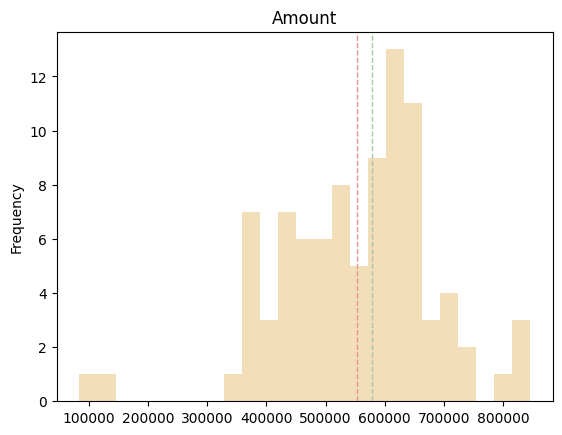

In [33]:
# mencari average amount harian
df_shipped = df_drop[df_drop['Status'] == 'Shipped']
df_ct= df_shipped[['Date','Amount']].groupby('Date').sum() 
# memvisualisasikan data untuk melihat bentuk distribusi data
df_ct['Amount'].plot.hist(title='Amount', color='#F3DEBA', bins=25);
plt.axvline(df_ct['Amount'].mean(), color='#E49393', linestyle='dashed', linewidth=1);        # warna pink
plt.axvline(df_ct['Amount'].median(), color='#ABC4AA', linestyle='dashed', linewidth=1); 

In [34]:
df_ct.skew()          #didapati date skewed left

Amount   -0.61271
dtype: float64

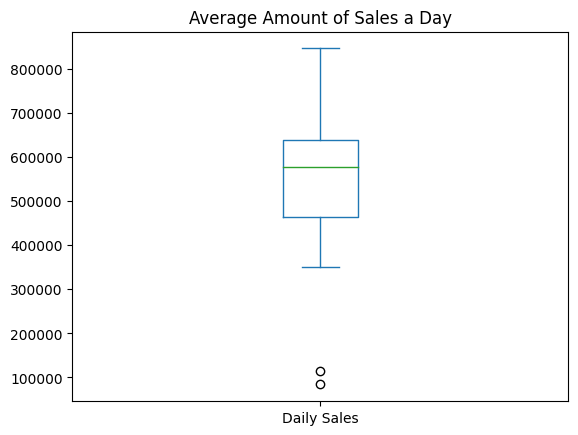

In [35]:
# Mengecek keberadaan outlier pada data site secara visualisasi
df_daily_sales = df_ct.rename(columns={'Amount': 'Daily Sales'})
df_daily_sales['Daily Sales'].plot(kind='box', title='Average Amount of Sales a Day');

In [36]:
# Melakukan deteksi outlier menggunakan IQR

Q1= df_daily_sales['Daily Sales'].quantile(0.25)
Q3= df_daily_sales['Daily Sales'].quantile(0.75)
IQR= Q3-Q1
print('IQR',IQR)

upper_limit= Q3 + 1.5*IQR
lower_limit= Q1 - 1.5*IQR

print('Batas atas outlier', upper_limit)
print('Batas bawah outlier',lower_limit)

df_outlier= df_daily_sales[(df_daily_sales['Daily Sales'] > upper_limit) | (df_daily_sales['Daily Sales'] < lower_limit)]

IQR 174929.0
Batas atas outlier 900925.0
Batas bawah outlier 201209.0


In [37]:
# Menghapus dua outlier
df_no_outlier = df_daily_sales.drop(df_outlier.index)
df_no_outlier

,Daily Sales
Date,
2022-04-01,620639.0
2022-04-02,656186.0
2022-04-03,726149.0
2022-04-04,621281.0
2022-04-05,674384.0
...,...
2022-06-24,423293.0
2022-06-25,458603.0
2022-06-26,511069.0


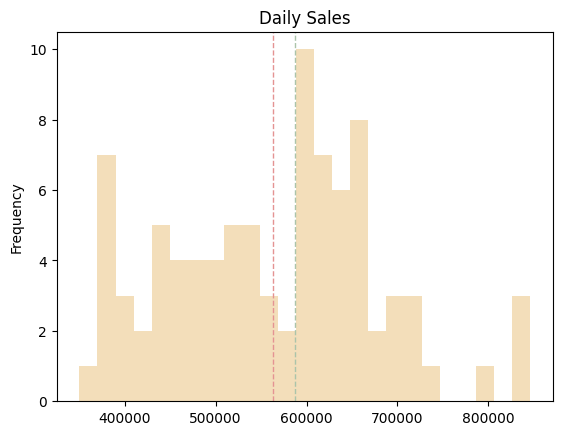

In [38]:
# Setelah mengetahui bahwa kolom load_weight memiliki missing values, data kemudian di visualisasikan untuk melihat bentuk data

df_no_outlier['Daily Sales'].plot.hist(title='Daily Sales', color='#F3DEBA', bins=25);
plt.axvline(df_no_outlier['Daily Sales'].mean(), color='#E49393', linestyle='dashed', linewidth=1);        # warna pink
plt.axvline(df_no_outlier['Daily Sales'].median(), color='#ABC4AA', linestyle='dashed', linewidth=1);      # warna hijau

Setelah dilakukan pembuangan outlier, kini data terlihat lebih tersebar secara normal.

## V. Analysis & Calculation

### 0) Deskriptif

Bagian ini akan melakukan perhitungan statistika yang akan mendeskripsikan isi dan tendensi data.

In [39]:
# Melihat unique value pada kolom status
df_drop['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Pending', 'Shipped - Picked Up', 'Shipped - Returning to Seller',
       'Shipped - Out for Delivery', 'Shipped - Lost in Transit',
       'Shipped - Damaged', 'Pending - Waiting for Pick Up'], dtype=object)

In [40]:
# Membuat query baru yang hanya menyaring pada data yang sudah terkirim. 
df_shipped = df_drop[df_drop['Status'] == 'Shipped']

In [41]:
# Membuat tabel baru yang menghitung harga satuan barang
df_shipped.loc[:, 'Rate Price'] = df_shipped['Amount'] / df_shipped['Qty']
pd.set_option('display.max_columns', None)

<ipython-input-41-015fa8c2b5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shipped.loc[:, 'Rate Price'] = df_shipped['Amount'] / df_shipped['Qty']


Dilakukan pencarian tendensi sentral data untuk mengetahui gambaran data.

In [42]:
# Mencari tendensi sentral dari data bertipe numerik dari data berstatus complete
# Sebelumnya, data di group dulu berdasarkan 'Date' untuk mendapatkan hasil yang sudah terdistribusi 

print('Tendensi Sentral Data Numerik')
df_ct= df_shipped[['Date','Amount']].groupby('Date').sum()
print('Rata-rata hasil penjualan per hari: {}'.format(np.round(df_ct['Amount'].mean())))
print('Median dari hasil penjualan per hari:',df_ct['Amount'].median())
df_qty= df_shipped[['Date','Qty']].groupby('Date').sum()
print('Rata-rata barang terjual per hari: {}'.format(np.round(df_qty['Qty'].mean())))
print('Median dari barang terjual per hari:',df_qty['Qty'].median())

Tendensi Sentral Data Numerik
Rata-rata hasil penjualan per hari: 552904.0
Median dari hasil penjualan per hari: 578239.0
Rata-rata barang terjual per hari: 855.0
Median dari barang terjual per hari: 859.0


In [43]:
# Mencari tendensi sentral dari data bertipe objek dari data berstatus complete
print('Tendensi Sentral Data Objek')
print('Modus dari Category:',df_shipped['Category'].mode().to_string(header=False, index=False))
print('Modus dari State:',df_shipped['ship-state'].mode().to_string(header=False, index=False))
print('Modus dari Style:',df_shipped['Style'].mode().to_string(header=False, index=False))
print('Modus dari Size:',df_shipped['Size'].mode().to_string(header=False, index=False))

Tendensi Sentral Data Objek
Modus dari Category: kurta
Modus dari State: MAHARASHTRA
Modus dari Style: JNE3405
Modus dari Size: M


Didapati gambaran data mengenai data numerik dan objektif. Dari sini kita jadi mengetahui gambaran barang yang paling laris, serta state yang paling sering melakukan transaksi dengan Amazon India. Disini juga kita dapat melihat kategori terlaris yakni kurta, serta size yang paling laris yakni M.

### 1) Volume penjualan total Amazon India selama periode yang dianalisis


In [44]:
# Tabel penjualan harian selama 91 hari

df_ct

,Amount
Date,
2022-03-31,84013.0
2022-04-01,620639.0
2022-04-02,656186.0
2022-04-03,726149.0
2022-04-04,621281.0
...,...
2022-06-25,458603.0
2022-06-26,511069.0
2022-06-27,447699.0


<Axes: xlabel='Date'>

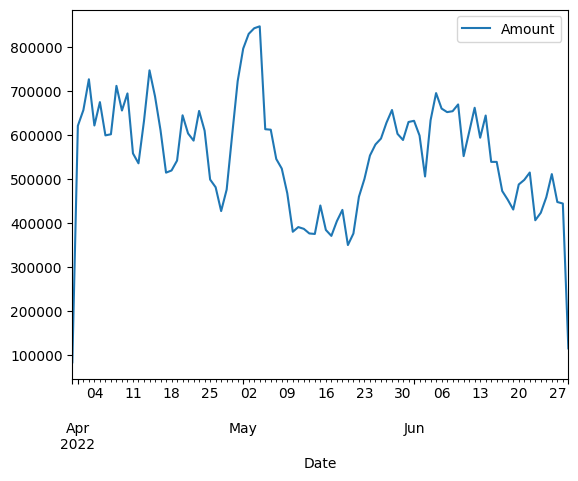

In [45]:
# Visualisasi pendapatan harian. Harga dalam satuan Indian Rupee.

df_ct.plot()

Pada grafik ini, kita dapat melihat bahwa penjualan Amazon India mengalami kenaikan dan bertemu titik puncak penjualan pada bulan Mei 2022 di angka ₹1,208,509. Sementara itu, penjualan kian menurun mendekati bulan Juli 2022.

### 2) Apakah ada perbedaan signifikan terhadap pemasukan pada bulan puncak dan keseluruhan date?

Selanjutnya akan dicari tahu mengenai korelasi penjualan bila memiliki tipe pelanggan yang berbeda.

Uji ini menggunakan metode one sample two tailed. Hipotesis untuk kasus ini:

**H0: μ = x̄**

**H1: μ != x̄**

In [46]:
# Membuat tabel baru untuk filtering 
may_table = df_ct.loc['2022-04-23':'2022-05-16']
may_amount = may_table['Amount']
may_amount_df = may_amount.to_frame(name='Amount')

In [47]:
print('Rata-rata hasil penjualan per hari: {}'.format(np.round(df_ct['Amount'].mean())))
print('Rata-rata hasil penjualan per hari: {}'.format(np.round(may_amount_df['Amount'].mean())))

Rata-rata hasil penjualan per hari: 552904.0
Rata-rata hasil penjualan per hari: 553200.0


In [48]:
# Melakukan t-test
t_stat,p_val = stats.ttest_1samp(may_amount_df.Amount, 552904)
print('P-value:',p_val/2) # dibagi dua karena merupakan 2 tail
print('t-statistics:',t_stat)

P-value: 0.49640231201917034
t-statistics: 0.009116724171182183


Nilai p 0.496 dan t-statistik 0.009 menunjukkan bahwa **tidak ada perbedaan** bold text yang signifikan secara statistik antara rata-rata kedua kelompok yang dibandingkan pada tingkat kepercayaan 95%. Dengan kata lain, kita gagal menolak hipotesis bahwa rata-rata kedua kelompok adalah sama. Hal ini menunjukkan bahwa kenaikan penjualan pada bulan Mei bukan merupakan hal yang signifikan.

### 3) State di India yang paling cocok untuk dijadikan potensi lokasi *site warehouse* baru dengan mempertimbangkan frekuensi penjualan

Diperlukan adanya pertimbangan untuk membangun *warehouse* untuk mempermudah kontrol untuk meningkatkan *engagement* bisnis di India.

In [49]:
# Membuat tabel yang berfungsi sebagai record count status setiap state
status_frequency = pd.pivot_table(df[['Status', 'ship-state']], index='ship-state', columns='Status', aggfunc=len, fill_value=0)
status_frequency

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
ship-state,,,,,,,,,,,,,
ANDAMAN & NICOBAR,45,2,3,138,0,44,0,0,14,0,7,4,0
ANDHRA PRADESH,892,25,16,3158,0,1196,0,2,43,2,88,8,0
APO,1,0,0,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,1,0,0,0,0,0,0,0,0,0
ARUNACHAL PRADESH,20,1,1,74,0,38,0,0,8,0,4,0,0
ASSAM,248,9,12,936,0,363,0,0,27,0,60,8,0
BIHAR,341,14,6,1199,0,459,0,1,30,0,56,8,0
CHANDIGARH,36,3,0,194,0,90,0,0,2,0,6,2,0
CHHATTISGARH,126,3,5,515,0,235,0,0,8,0,17,0,0


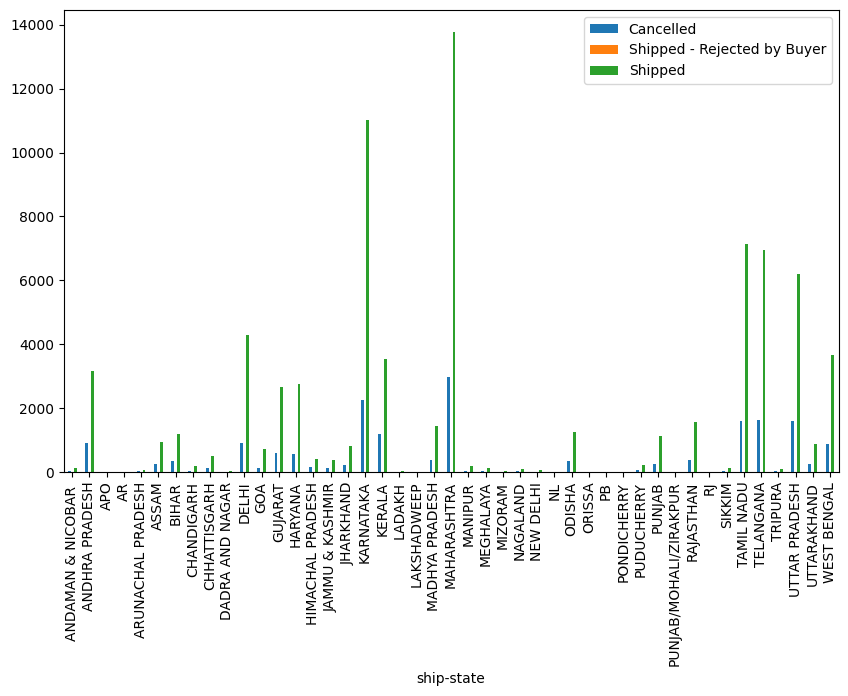

In [50]:
# Melihat kecenderungan customer di region tertentu yang melakukan cancel dan reject barang
state_cancelled = pd.DataFrame(status_frequency, columns=['Cancelled', 'Shipped - Rejected by Buyer', 'Shipped'])

ax = state_cancelled.plot(kind='bar', figsize=(10,6), rot=0)
plt.xticks(rotation='vertical')
plt.show()

Dilihat dari jumlah order yang terlaksanakan, ternyata kota Maharashta menjadi kota yang paling banyak bertransaksi dengan Amazon India. Maharashta juga memiliki jumlah cancel order yang tertinggi, namun hal itu tertutupi oleh jumlah order terlaksana yang juga sangat tinggi bila dibanding dengan keseluruhan populasi. Hal ini dapat membuat kota tersebut menjadi site yang berpotensial untuk menjadi *warehouse*. Selanjutnya, perlu dicari potensi site yang dapat dihitung berdasarkan penjualan terbanyak. 

### 4) State di India yang paling cocok untuk dijadikan potensi lokasi *site warehouse* baru dengan mempertimbangkan total penjualan

In [51]:
# Menghitung tendensi sentral serta simpangan baku dari 'Amount' atau jumlah penjualan dalam INR yang dikelompokkan untuk masing-masing state

df_state = df_shipped.groupby('ship-state')

df_state = df_state.agg({'Amount': ['mean', 'median', lambda x: x.mode()[0], 'std']})
df_state.columns = ['mean_amount', 'median_amount', 'mode_amount', 'std_amount']
df_state = df_state.sort_values(by='mean_amount', ascending=False)
df_state

,mean_amount,median_amount,mode_amount,std_amount
ship-state,,,,
LADAKH,905.571429,892.5,771.0,311.407251
NAGALAND,858.786408,852.0,857.0,329.418669
LAKSHADWEEP,845.000000,845.0,845.0,NaN
BIHAR,725.724541,680.0,399.0,312.508899
MANIPUR,724.346154,712.5,771.0,303.621813
ARUNACHAL PRADESH,721.135135,693.0,493.0,260.276582
JAMMU & KASHMIR,714.436031,652.0,563.0,321.469508
SIKKIM,708.116667,698.0,735.0,260.620887
HIMACHAL PRADESH,706.739130,664.0,399.0,312.709760


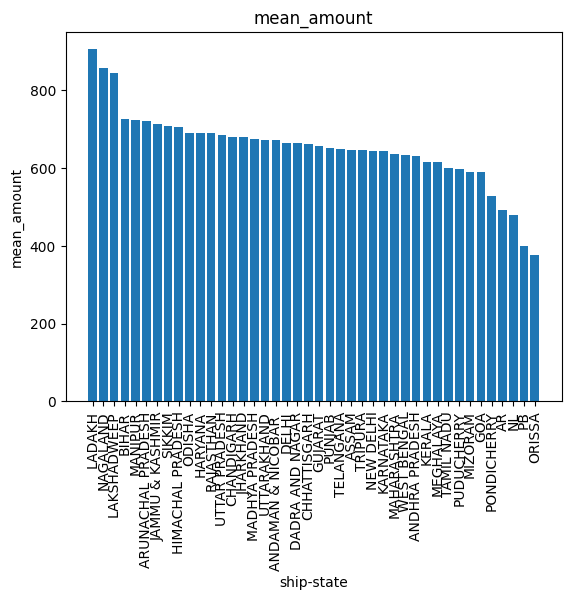

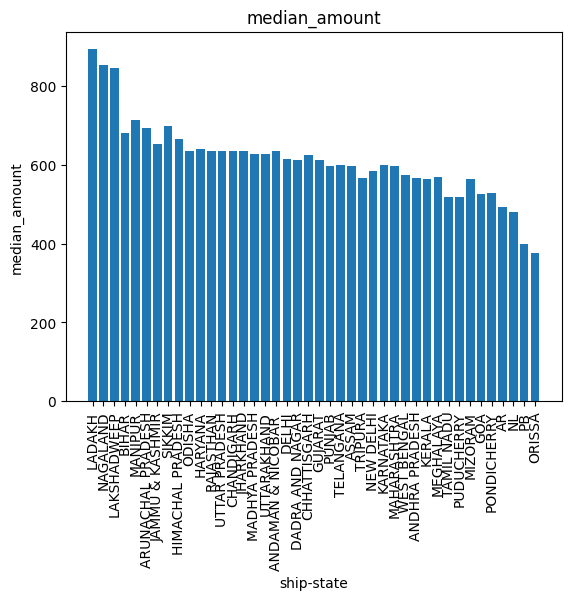

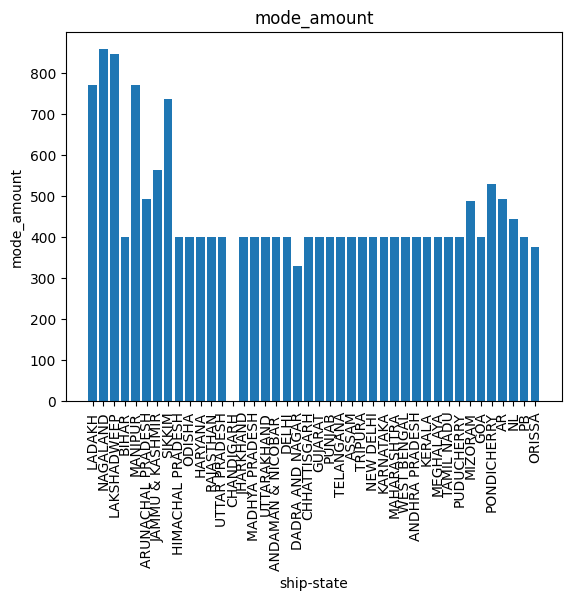

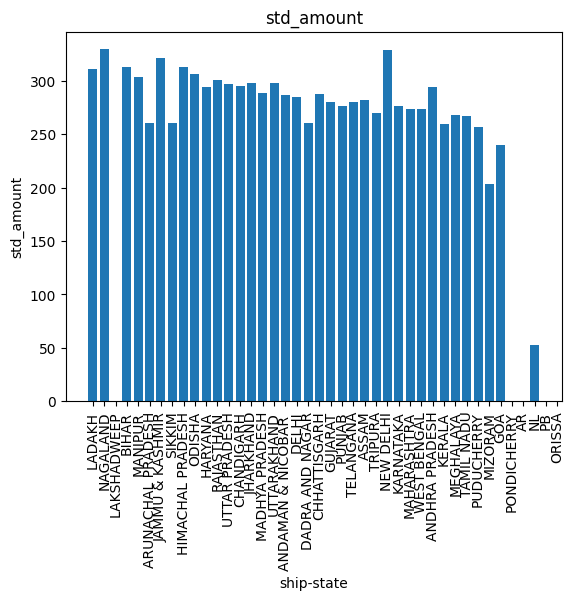

In [52]:
# membuat bar plot untuk masing-masing kolom
for col in df_state.columns:
    plt.figure()
    plt.bar(df_state.index, df_state[col])
    plt.title(col)
    plt.xlabel('ship-state')
    plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
    plt.ylabel(col)
    plt.show()

Ternyata setelah kita lihat rata-rata penjualan harian, justru kota Ladakh yang memiliki hasil penjualan terbesar, yakni sekitar ₹905. Maharashta, yang memiliki frekuensi transaksi terbanyak justru hanya memiliki rata-rata penjualan harian sekitar ₹635. Hal ini menjadi pertimbangan apakah Amazon India ingin membuat *warehouse* di state yang memberikan pemasukan terbanyak, atau di state yang memiliki frekuensi transaksi terbanyak.

### 5) Kategori barang yang paling diminati oleh pelanggan

Setelah memiliki potensial site, kini dicari kategori yang paling diminati oleh pelanggan Amazon India. Data tercantum adalah data yang sudah disaring hanya pada data berstatus shipped atau complete.

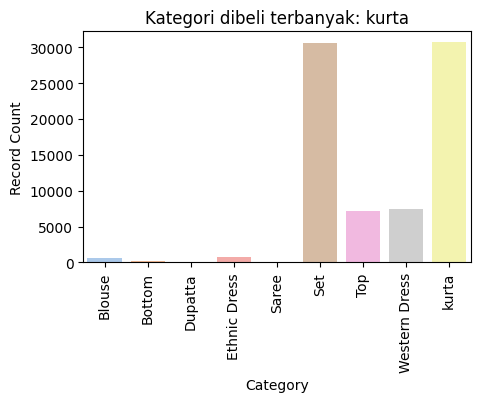

In [53]:
# mengelompokkan data berdasarkan kategori dan menghitung jumlah untuk setiap kategori
category_count = df_shipped.groupby('Category').size().reset_index(name='Count')

# mendapatkan kategori dengan jumlah maksimum
max_category = category_count.loc[category_count['Count'].idxmax()]['Category']

# membuat diagram batang dari jumlah untuk setiap kategori
plt.figure(figsize=(5,3))
sns.barplot(x='Category', y='Count', data=category_count, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Record Count')
plt.title(f'Kategori dibeli terbanyak: {max_category}')
plt.show()

Didapati bahwa kategori terlaris adalah kurta, dan diikuti oleh set sebagai ketegori terlaris ke-2. Selanjutnya akan dilihat state mana yang paling banyak mengonsumsi kategori kurta.

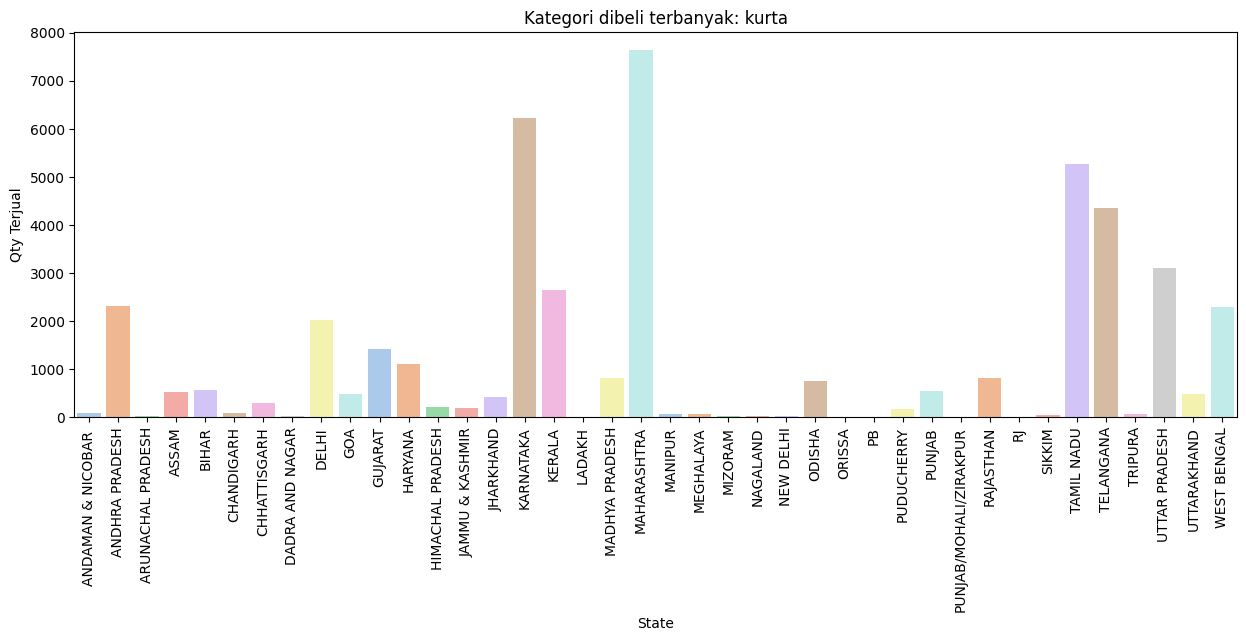

In [54]:
category_sales = df_shipped.groupby('Category')['Qty'].sum().reset_index()

# mencai maksimal quantity dari category
max_category = category_sales.loc[category_sales['Qty'].idxmax()]['Category']

# menjumlahkan kuantitas category dari tiap state.
category_state_sales = df.groupby(['Category', 'ship-state'])['Qty'].sum().reset_index()

# filtering agar hanya menampilkan kategori maks
max_category_data = category_state_sales[category_state_sales['Category'] == max_category]

# Membuat visualisasi data
plt.figure(figsize=(15,5))
sns.barplot(x='ship-state', y='Qty', data=max_category_data, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Qty Terjual')
plt.title(f'Kategori dibeli terbanyak: {max_category}')
plt.show()

Ternyata state yang paling banyak membeli kategori kurta adalah Maharashtra.

### 6) Pelanggan apa yang paling banyak berlangganan dengan Amazon India?

Analisis mengenai tipe pelanggan yang berlangganan dengan Amazon India, yakni diantara business-to-business atau business-to-customer. Ada asumsi bahwa B2B atau *reseller* dapat membantu melariskan penjualan, maka hal ini perlu untuk ditelusuri. 

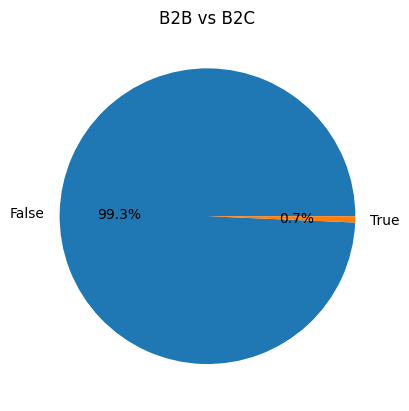

In [55]:
B2B_counts = df_shipped['B2B'].value_counts()

# Membuat pie chart dari data boolean
plt.pie(B2B_counts, labels=B2B_counts.index, autopct='%1.1f%%')
plt.title('B2B vs B2C')
plt.show()

In [56]:
# Membuat tabel yang menghitung status setiap state
B2B_frequency = pd.pivot_table(df[['B2B', 'ship-state']], index='ship-state', columns='B2B', aggfunc=len, fill_value=0)
B2B_frequency

B2B,False,True
ship-state,,
ANDAMAN & NICOBAR,256,1
ANDHRA PRADESH,5405,25
APO,1,0
AR,1,0
ARUNACHAL PRADESH,146,0
ASSAM,1659,4
BIHAR,2111,3
CHANDIGARH,326,7
CHHATTISGARH,906,3


Dari grafik tersebut diketahui bahwa customer mayoritas Amazon India berdasarkan frekuensi transaksi adalah customer perorangan. Setelahnya akan dilakukan pengecekan berdasarkan jumlah pemasukan.

In [57]:
# Menghitung total penjualan untuk B2B dan B2C
B2B_sales_total = df_shipped.loc[df_shipped['B2B'] == True, 'Amount'].sum().round(2)
non_B2B_sales_total = df_shipped.loc[df_shipped['B2B'] == False, 'Amount'].sum().round(2)

print('Total pemasukan untuk penjualan B2B:', B2B_sales_total)
print('Total pemasukan untuk penjualan B2C:', non_B2B_sales_total)

Total pemasukan untuk penjualan B2B: 363374.0
Total pemasukan untuk penjualan B2C: 49950905.0


Setelah dilihat melalui total penjualan dalam INR, ternyata penjualan customer perorangan juga merupakan pemasukan Amazon India yang lebih utama.

Ternyata tipe pelanggan yang paling banyak berlangganan dengan Amazon India adalah customer perorangan. Hal ini menunjukkan bahwa Amazon India memiliki kekuatan dari loyalitas customer yang harus dipertahankan. Namun sementara itu, hal ini juga menunjukkan kurangnya *reseller* yang bekerja sama secara tidak langsung dengan Amazon.

### 7) Apakah ada korelasi dari penjualan tiap kategori dengan tipe pelanggan?

Selanjutnya akan dicari tahu mengenai korelasi penjualan bila memiliki tipe pelanggan yang berbeda.

Uji ini menggunakan metode Chi-Square. Hipotesis untuk kasus ini:

**H0: B2B = B2C**

**H1: B2B != B2C**

In [58]:
# Membuat contingency table dari category dan kolom boolean
contingency_table_cat =pd.crosstab(df_shipped['Category'],df_shipped["B2B"])
contingency_table_cat

B2B,False,True
Category,,
Blouse,612,7
Bottom,219,2
Dupatta,3,0
Ethnic Dress,743,11
Saree,117,2
Set,30360,207
Top,7087,46
Western Dress,7419,53
kurta,30490,202


In [59]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table_cat)     # perform chi quare
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.203
Probably independent


Ternyata kategori atau jenis baju dari penjualan Amazon India dengan tipe pelanggan (*reseller*) tidak saling berhubungan. Hal ini menunjukkan bahwa penjualan via *reseller* maupun perorangan untuk tiap-tiap kategori memiliki masa laris dan masa penurunannya sendiri (mungkin berhubungan dengan musim, hari raya, dsb). Namun sebenarnya secara tidak langsung hal ini juga menggambarkan bahwa *reseller* Amazon India kurang melibatkan diri dalam mengikuti tren customer Amazon India. 

### 8) Uji hipotesis rata-rata penjualan pada kedua site potensial

Membandingkan rata-rata penjualan pada site yang berkemungkinan untuk menjadi site potensi pembangunan *warehouse* baru. Uji ini merupakan *one sample one tail test*.
Hipotesis untuk kasus ini:

**H0: Ladakh <= Maharashtra**

**H1: Ladakh > Maharashtra**

In [60]:
# Membuat query dan mencari rata-rata penjualan perhari di Ladakh
df_ladakh = df_shipped[df_shipped['ship-state'] == 'LADAKH']
df_ladakh.groupby('Date')['Amount'].mean()
ladakh_avg = df_ladakh['Amount'].sum()/df_ladakh.shape[0]
print('Rata-rata hasil penjualan per hari di Ladakh:', ladakh_avg.round(2))

Rata-rata hasil penjualan per hari di Ladakh: 905.57


In [61]:
# Membuat query dan mencari rata-rata penjualan perhari di Maharashtra
df_maharashta = df_shipped[df_shipped['ship-state'] == 'MAHARASHTRA']
df_maharashta.groupby('Date')['Amount'].mean()
maharashta_avg = df_maharashta['Amount'].sum()/df_maharashta.shape[0]
print('Rata-rata hasil penjualan per hari di Ladakh:', maharashta_avg.round(2))

Rata-rata hasil penjualan per hari di Ladakh: 635.72


In [62]:
# convert ke dataframe agar bisa di visualisasikan
ladakh_table = pd.DataFrame(df_shipped[df_shipped['ship-state'] == 'LADAKH'].groupby('Date')['Amount'].mean())
maharashtra_table = pd.DataFrame(df_shipped[df_shipped['ship-state'] == 'MAHARASHTRA'].groupby('Date')['Amount'].mean())

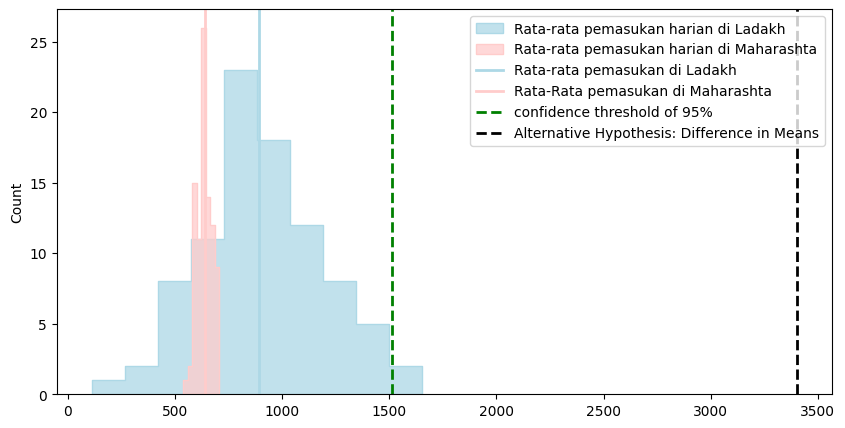

In [63]:
# Preparasi untuk visualisasi data
# mengambil 90 sample (harian)
ladakh_avg_h = np.random.normal(ladakh_table.Amount.mean(),ladakh_table.Amount.std(),90)
maharashtra_avg_h = np.random.normal(maharashtra_table.Amount.mean(),maharashtra_table.Amount.std(),90)

t_stat, p_value = stats.ttest_ind(ladakh_avg_h, maharashtra_avg_h)
# membuat variabel baru yang menampung confidence interval dengan level confidence 95%
ci = stats.norm.interval(0.95, ladakh_table.Amount.mean(), ladakh_table.Amount.std())

# memvisualisasikan data untuk melihat titik hipotesis
# Menggunakan histogram dan mengatur label, warna, dan atribut lainnya
plt.figure(figsize=(10,5))
sns.histplot(ladakh_avg_h, label='Rata-rata pemasukan harian di Ladakh', color='#ADD8E6', element='step')
sns.histplot(maharashtra_avg_h, label='Rata-rata pemasukan harian di Maharashta', color='#ffcccb', element='step')

plt.axvline(ladakh_table.Amount.mean(), color='#ADD8E6', linewidth=2, label='Rata-rata pemasukan di Ladakh')
plt.axvline(maharashtra_table.Amount.mean(), color='#ffcccb',  linewidth=2, label='Rata-Rata pemasukan di Maharashta')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ladakh_avg_h.mean()+t_stat*ladakh_avg_h.std(), color='black', linestyle='dashed', linewidth=2, label='Alternative Hypothesis: Difference in Means')
plt.legend()

In [64]:
# FIltering data yang berasal dari state yang diinginkan
df_ladakh = df_shipped.loc[df_shipped['ship-state'] == 'LADAKH', 'Amount']
df_maharashtra = df_shipped.loc[df_shipped['ship-state'] == 'MAHARASHTRA', 'Amount']

# Melakukan t-test
t_stat, p_val = stats.ttest_ind(df_ladakh, df_maharashtra)
print('P-value:', p_val/2) 
print('t-statistics:', t_stat)

P-value: 9.802774151861237e-08
t-statistics: 5.205690194778


Nilai t-statistik 5,205 dan nilai p 9,80e-87 menunjukkan bahwa perbedaan rata-rata antara kedua kelompok signifikan secara statistik, dan kita dapat menolak asumsi bahwa rata-ratanya sama. Hal ini menunjukkan bahwa ada kemungkinan perbedaan yang nyata dalam pemasukan harian yang dihasilkan antara kedua lokasi, yakni pemasukan Ladakh **lebih besar dibandingkan** pemasukan di Maharashtra.

## VI. Conclusion & Asumptions

Dengan menggunakan data aktivitas penjualan produk fashion di *platform e-commerce* Amazon India dari bulan Maret hingga Juni 2022, didapati beberapa poin yang diperuntukkan sebagai masukan serta pencetusan strategi bisnis bagi Amazon India yakni:

1. Tidak ada perbedaan yang signifikan terhadap rata-rata pemasukan puncak dan rata-rata pemasukan harian total.
2. Modus untuk data barang terbeli adalah kurta (category) dan M (size), yang dapat menjadi pertimbangan untuk melakukan restock pada barang-barang yang menjadi favorit customer.
2. Pertimbangan untuk membangun site warehouse baru di India untuk membantu kontrol barang, memperluas koneksi, serta menjaga *engagement* terhadap negara tersebut.
3. Site berpotensial yang disarankan oleh *data analyst* adalah Maharashta sebagai site dengan jumlah transaksi terbanyak atau Ladakh sebagai site yang memberi pemasukan terbanyak.
4. Rata-rata pemasukan dari dua site potensial yakni Ladakh dan Maharashta teruji tidak sama dengan Ladakh. Hal ini menunjukkan ada perbedaan yang signifikan dalam tingginya pemasukan Ladakh. Namun, *data analyst* menyarankan untuk meneliti Maharashta lebih lanjut karena alasan pemilihan site tidak hanya dilihat dari pemasukan, melainkan juga pada potensi site kedepannya. 
5. Pelanggan terbanyak di Amazon India adalah customer pribadi/ perorangan, yang menandakan bahwa Amazon India harus mempertahankan loyalitas customer tersebut--namun pada saat yang bersamaan juga harus membangun strategi untuk meningkatkan jumlah *reseller* atau B2B untuk meningkatkan penjualan dengan lebih pesat.
6. Kategori terlaris adalah 'Set', dan pembelian jenis kategori tidak memiliki hubungan dengan subjek customer (reseller/ customer). Hal ini menunjukkan bahwa penjualan via reseller maupun perorangan untuk tiap-tiap kategori memiliki masa laris dan masa penurunannya sendiri--namun sebenarnya juga secara tidak langsung hal ini juga menggambarkan bahwa reseller Amazon India kurang melibatkan diri dalam mengikuti tren customer Amazon India.

Demikian laporan analisis ini yang diharapkan dapat memberi masukan serta pengetahuan untuk perkembangan Amazon India kedepannya.